# Notebook 06: Demo Usage — How to Use the Generated Dataset
**Project:** Synthetic Sleep Environment Dataset Generator  
**Authors:** Rushav Dash & Lisa Li  
**Course:** TECHIN 513 — Signal Processing & Machine Learning  
**University:** University of Washington  
**Date:** 2026-02-19

## Introduction

Welcome to the **Synthetic Sleep Environment Dataset** — a fully reproducible,
statistically validated collection of 5,000 simulated sleep sessions linking
bedroom environmental conditions to polysomnographic sleep quality metrics.

This notebook demonstrates four practical research workflows:

| Demo | Task |
|------|------|
| **1** | Predict sleep efficiency from environmental features |
| **2** | Analyse seasonal variation in sleep quality |
| **3** | Identify environmental conditions of optimal sleep |
| **4** | Compare case studies: good / average / poor nights |

## Table of Contents
1. [Setup & Load Dataset](#section-1)
2. [Demo 1: Predict Sleep Efficiency](#section-2)
3. [Demo 2: Seasonal Sleep Quality Analysis](#section-3)
4. [Demo 3: Optimal Sleep Conditions](#section-4)
5. [Demo 4: Three Case Studies](#section-5)
6. [Conclusion & Next Steps](#section-6)

---
## 1. Setup & Load Dataset <a id='section-1'></a>

In [1]:
import sys, os, json
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
plt.rcParams.update({'figure.dpi': 120, 'font.size': 11})
sns.set_theme(style='whitegrid')
print('Setup complete.')

Setup complete.


In [2]:
CSV_PATH = os.path.join(PROJECT_ROOT, 'data', 'output', 'synthetic_sleep_dataset_5000.csv')
df = pd.read_csv(CSV_PATH)
print(f'Dataset loaded: {len(df):,} sessions  x  {len(df.columns)} columns')

# Separate column groups
TS_COLS    = [c for c in df.columns if c.startswith('ts_')]
META_COLS  = ['session_id', 'session_index', 'season', 'age_group', 'sensitivity', 'random_seed']
LABEL_COLS = ['sleep_efficiency', 'awakenings', 'rem_pct', 'deep_pct', 'light_pct']
FEAT_COLS  = [c for c in df.columns if c not in TS_COLS + META_COLS + LABEL_COLS]
print(f'Feature columns: {len(FEAT_COLS)}')

df[META_COLS + LABEL_COLS].head()

Dataset loaded: 5,000 sessions  x  44 columns
Feature columns: 29


,session_id,session_index,season,age_group,sensitivity,random_seed,sleep_efficiency,awakenings,rem_pct,deep_pct,light_pct
0,00000000-0000-0000-6265-623f6213bbb4,0,winter,young,low,7090181212732636084,0.7460,3,17.3,70.3,12.4
1,00000000-0000-0001-3473-ecc6ee0a9a49,1,winter,young,normal,3779624851435330121,0.7233,2,19.9,68.6,11.5
2,00000000-0000-0002-8fd3-7f3693267e96,2,winter,young,high,10363767039883378326,0.9188,1,18.7,71.1,10.2
3,00000000-0000-0003-f955-262f90f79db7,3,winter,middle,low,17966308274201927095,0.8322,3,21.3,61.0,17.7
4,00000000-0000-0004-f323-0861f0c515fe,4,winter,middle,normal,17519856192145659390,0.8281,1,23.8,67.2,9.0


---
## 2. Demo 1: Predict Sleep Efficiency from Environmental Features <a id='section-2'></a>

Train a Random Forest Regressor on the environmental features to predict `sleep_efficiency`.
This demonstrates the dataset's utility as a benchmark for predictive modelling.

In [3]:
X = df[FEAT_COLS].select_dtypes(include='number').fillna(0)
y = df['sleep_efficiency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)

print(f'Test RMSE : {rmse:.4f}')
print(f'Test R²   : {r2:.4f}')
print(f'Test MAE  : {mae:.4f}')

Test RMSE : 0.0449
Test R²   : 0.5831
Test MAE  : 0.0349


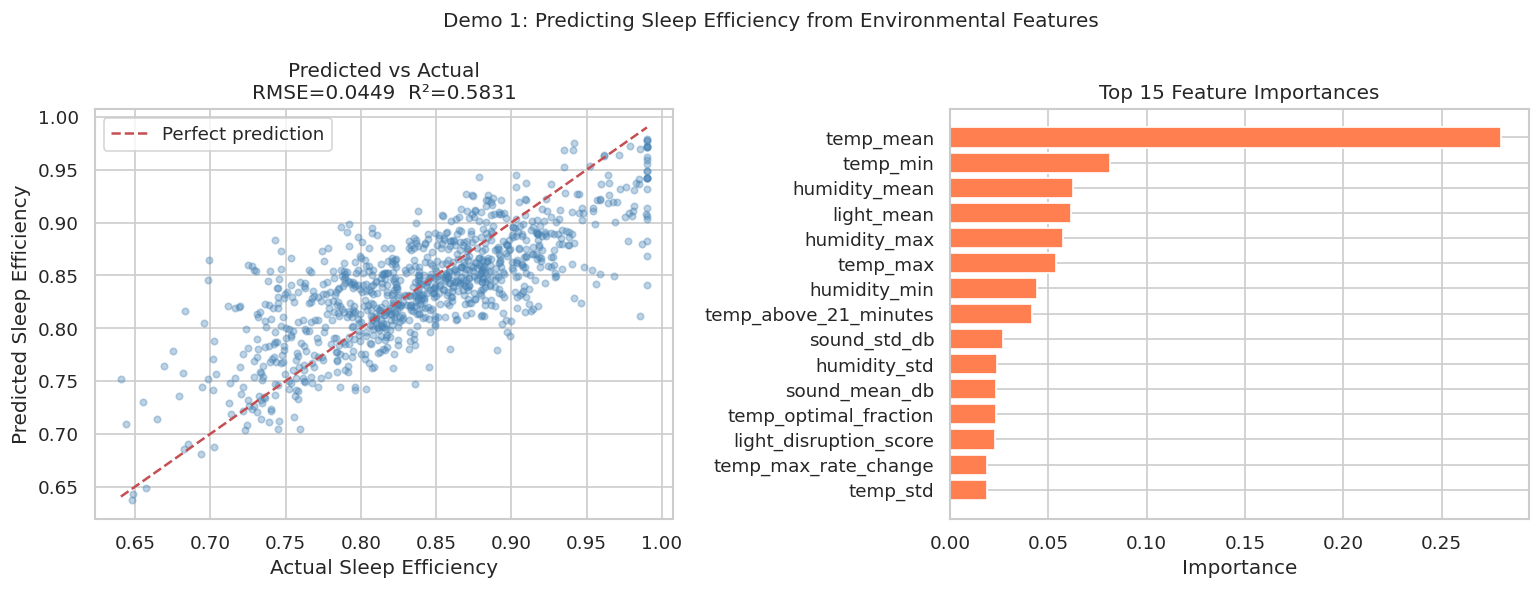

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Predicted vs actual
axes[0].scatter(y_test, y_pred, alpha=0.35, s=15, color='steelblue')
lo, hi = y_test.min(), y_test.max()
axes[0].plot([lo, hi], [lo, hi], 'r--', linewidth=1.5, label='Perfect prediction')
axes[0].set_xlabel('Actual Sleep Efficiency')
axes[0].set_ylabel('Predicted Sleep Efficiency')
axes[0].set_title(f'Predicted vs Actual\nRMSE={rmse:.4f}  R²={r2:.4f}')
axes[0].legend()

# Feature importance
feat_names = list(X.columns)
importances = rf.feature_importances_
sorted_idx  = np.argsort(importances)[-15:]  # top 15
axes[1].barh(
    [feat_names[i] for i in sorted_idx],
    [importances[i] for i in sorted_idx],
    color='coral'
)
axes[1].set_xlabel('Importance')
axes[1].set_title('Top 15 Feature Importances')

plt.suptitle('Demo 1: Predicting Sleep Efficiency from Environmental Features', fontsize=12)
plt.tight_layout()
plt.show()

---
## 3. Demo 2: Seasonal Sleep Quality Analysis <a id='section-3'></a>

Does sleep quality differ across seasons? Visualise efficiency and awakening distributions.

/tmp/ipykernel_2192400/2820193741.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/tmp/ipykernel_2192400/2820193741.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


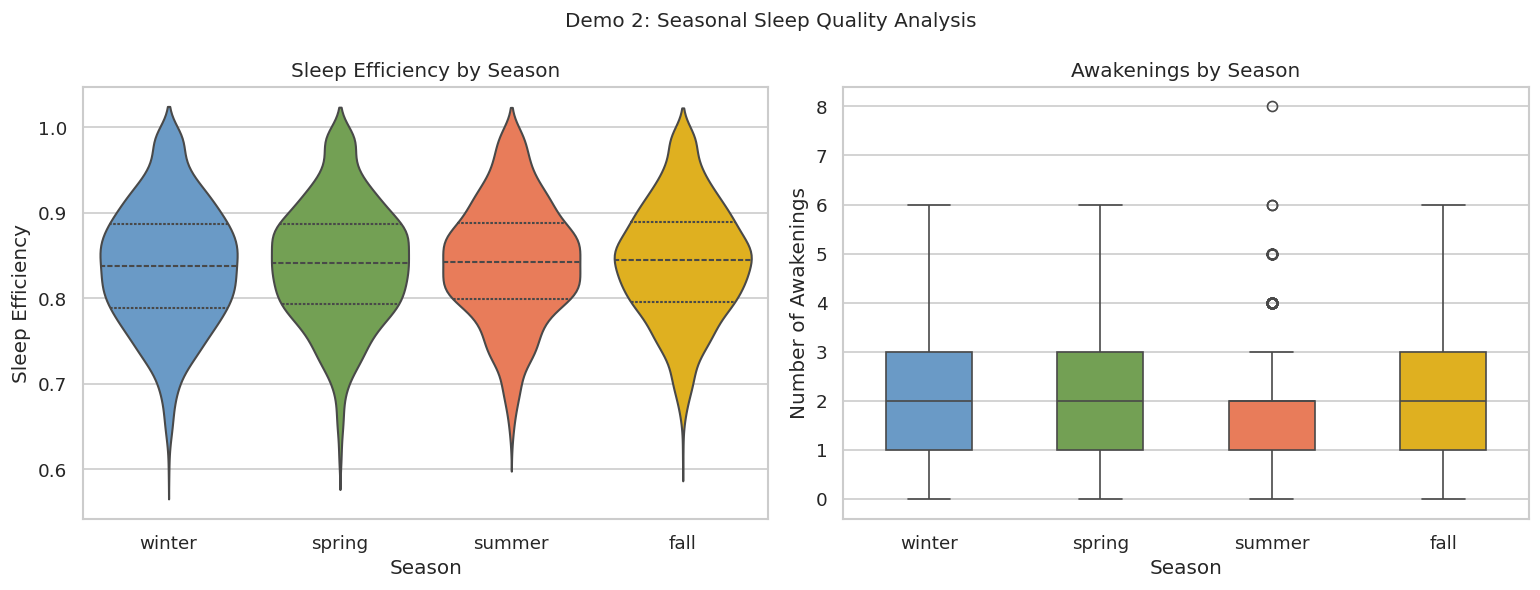


Seasonal sleep efficiency summary:


,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
fall,1250.0,0.8430,0.0683,0.6195,0.7963,0.8448,0.8892,0.99
spring,1250.0,0.8407,0.0700,0.6102,0.7930,0.8410,0.8870,0.99
summer,1250.0,0.8421,0.0694,0.6314,0.7990,0.8424,0.8884,0.99
winter,1250.0,0.8379,0.0718,0.6001,0.7884,0.8382,0.8874,0.99


In [5]:
season_order = ['winter', 'spring', 'summer', 'fall']
palette = {
    'winter': '#5B9BD5',
    'spring': '#70AD47',
    'summer': '#FF7043',
    'fall':   '#FFC000',
}

fig, axes = plt.subplots(1, 2, figsize=(13, 5))

# Sleep efficiency by season
sns.violinplot(
    data=df, x='season', y='sleep_efficiency',
    order=season_order, palette=palette,
    inner='quartile', ax=axes[0]
)
axes[0].set_title('Sleep Efficiency by Season')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Sleep Efficiency')

# Awakenings by season
sns.boxplot(
    data=df, x='season', y='awakenings',
    order=season_order, palette=palette,
    width=0.5, ax=axes[1]
)
axes[1].set_title('Awakenings by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Number of Awakenings')

plt.suptitle('Demo 2: Seasonal Sleep Quality Analysis', fontsize=12)
plt.tight_layout()
plt.show()

# Summary table
print('\nSeasonal sleep efficiency summary:')
display(df.groupby('season')['sleep_efficiency'].describe().round(4))

---
## 4. Demo 3: Optimal Sleep Conditions <a id='section-4'></a>

Filter for sessions with **sleep efficiency > 0.85** to reveal the environmental
conditions associated with high-quality sleep.

In [6]:
df_optimal = df[df['sleep_efficiency'] > 0.85].copy()
df_poor    = df[df['sleep_efficiency'] < 0.65].copy()
print(f'Optimal sessions (eff > 0.85): {len(df_optimal):,}  ({100*len(df_optimal)/len(df):.1f}%)')
print(f'Poor sessions    (eff < 0.65): {len(df_poor):,}  ({100*len(df_poor)/len(df):.1f}%)')

Optimal sessions (eff > 0.85): 2,265  (45.3%)
Poor sessions    (eff < 0.65): 17  (0.3%)


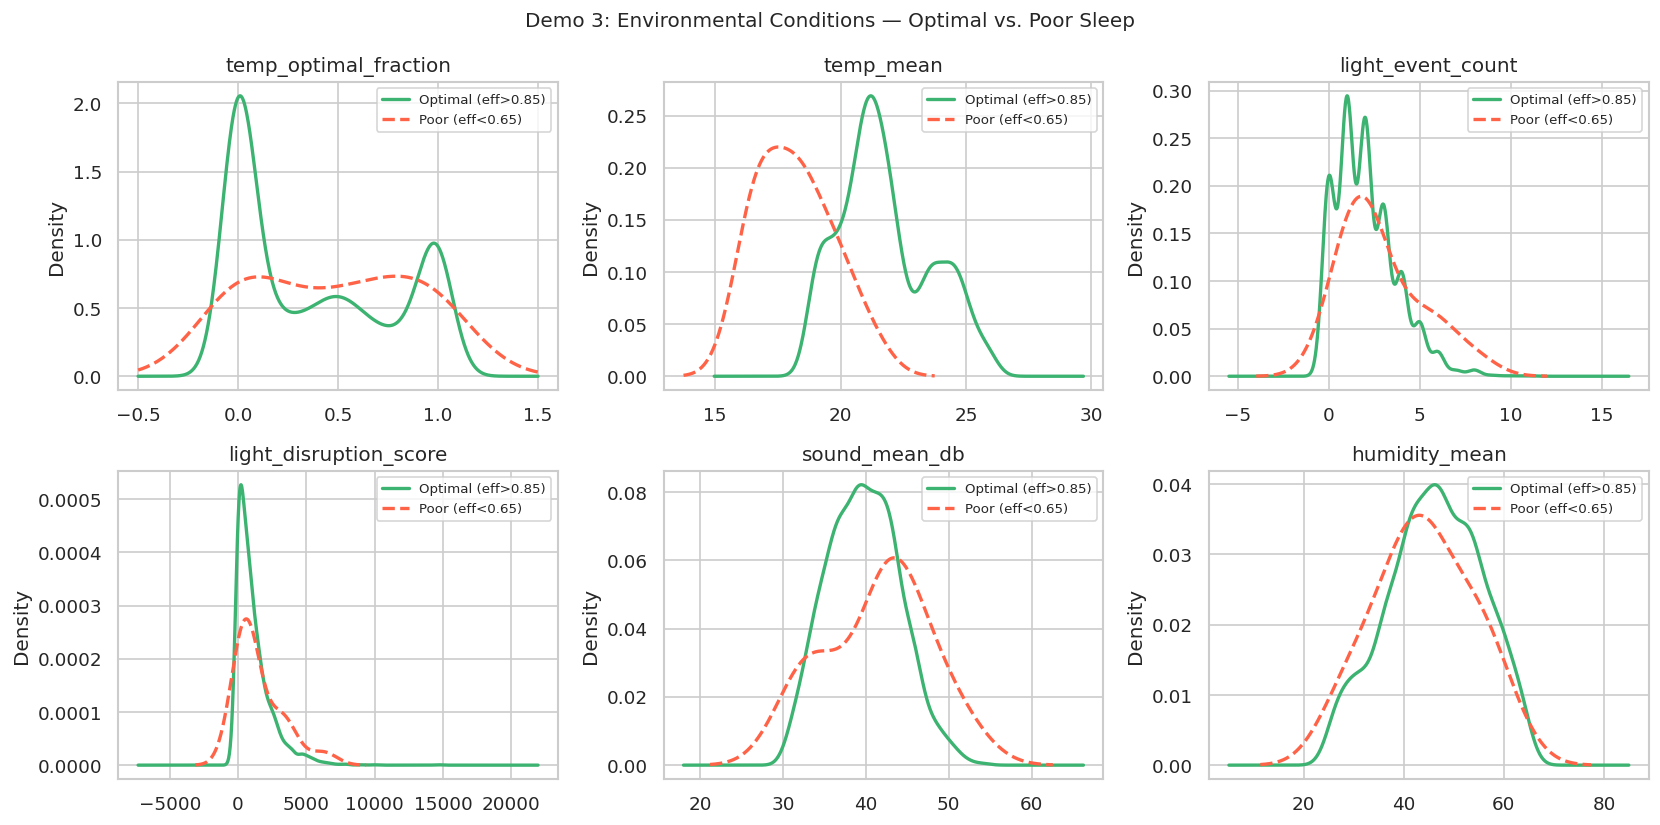

In [7]:
env_features_to_compare = [
    'temp_optimal_fraction', 'temp_mean', 'light_event_count',
    'light_disruption_score', 'sound_mean_db', 'humidity_mean'
]
env_features_to_compare = [f for f in env_features_to_compare if f in df.columns]

n_feats = len(env_features_to_compare)
fig, axes = plt.subplots(2, 3, figsize=(14, 7))
axes = axes.flatten()

for ax, feat in zip(axes[:n_feats], env_features_to_compare):
    df_optimal[feat].plot.kde(ax=ax, label='Optimal (eff>0.85)', color='mediumseagreen', linewidth=2)
    df_poor[feat].plot.kde(ax=ax, label='Poor (eff<0.65)', color='tomato', linewidth=2, linestyle='--')
    ax.set_title(feat)
    ax.legend(fontsize=8)

for j in range(n_feats, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Demo 3: Environmental Conditions — Optimal vs. Poor Sleep', fontsize=12)
plt.tight_layout()
plt.show()

---
## 5. Demo 4: Three Case Studies — Good / Average / Poor Night <a id='section-5'></a>

Plot the temperature and light time-series for three example sessions representing
the spectrum of sleep quality.

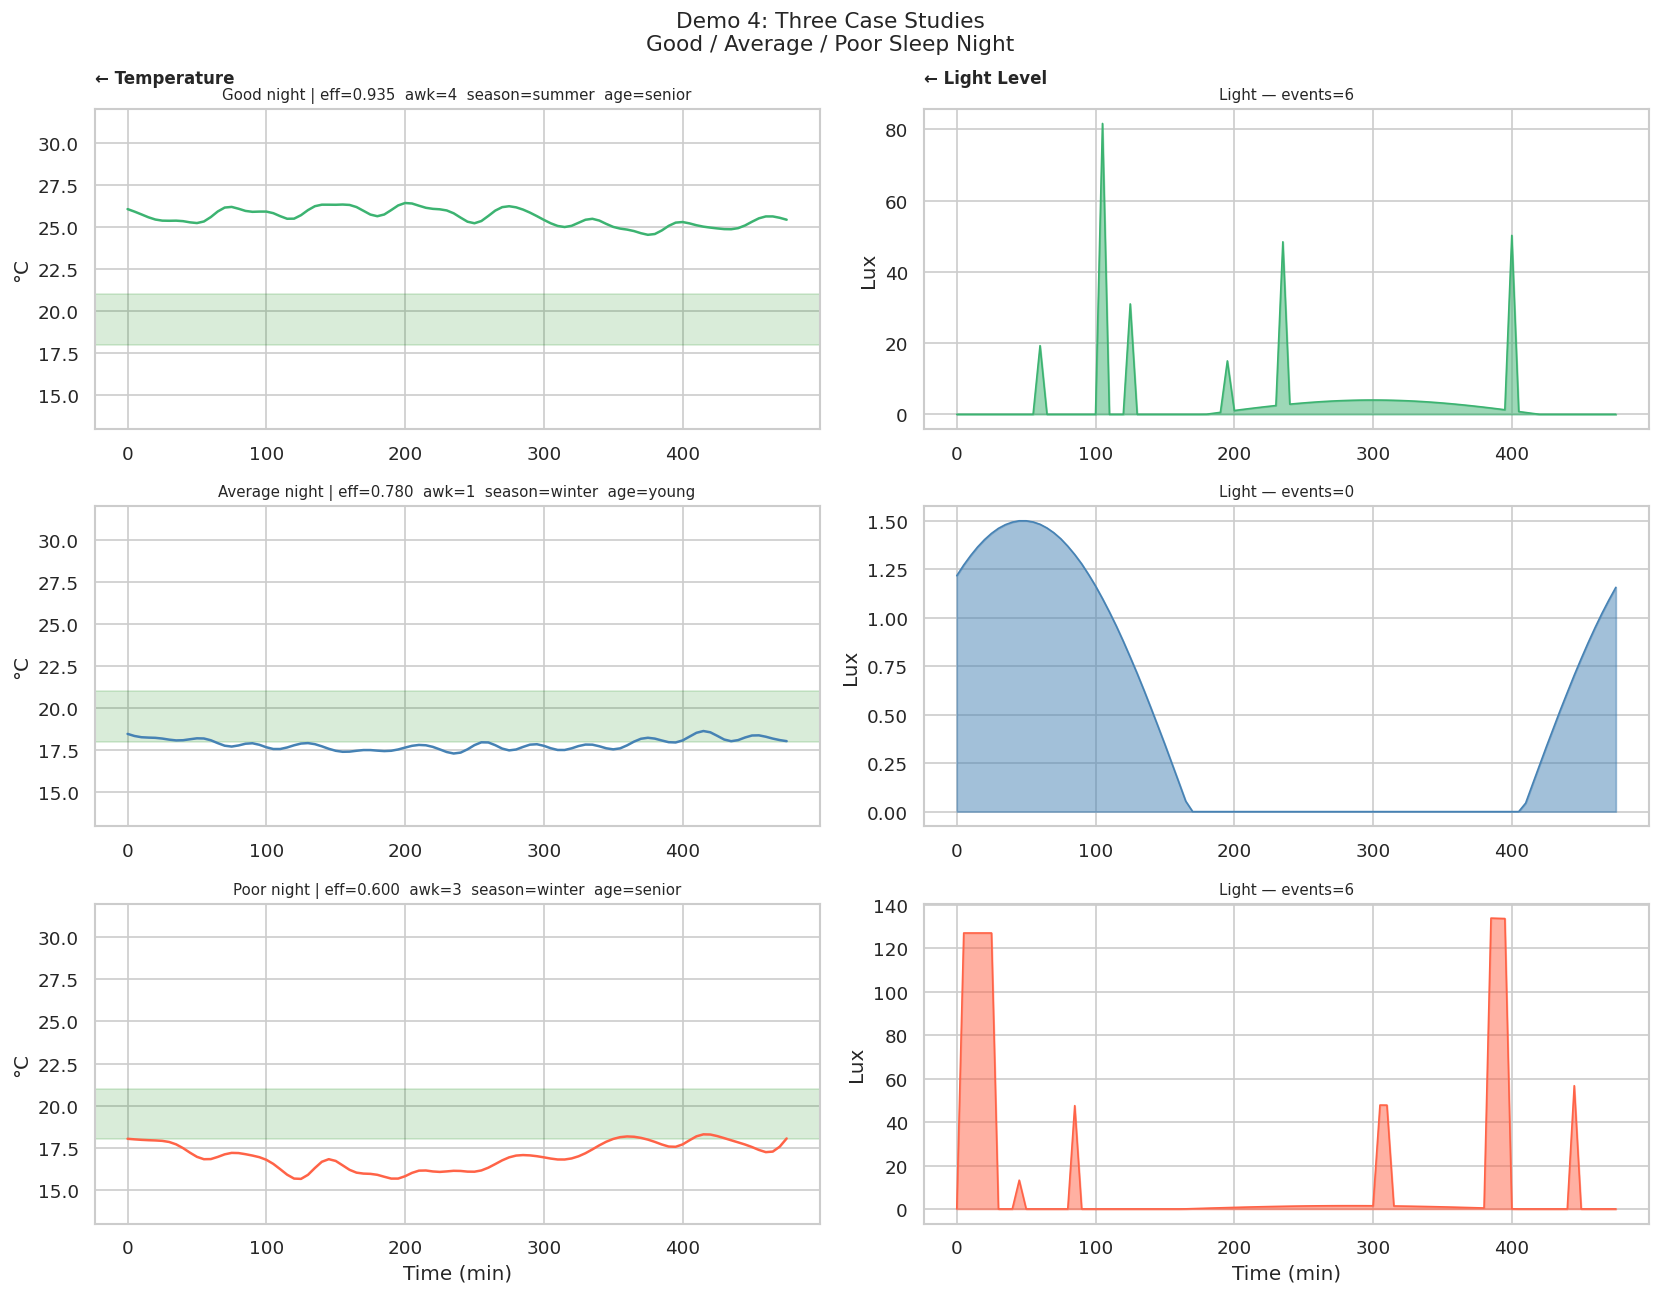

In [8]:
def find_representative_session(df, eff_range):
    """Return the session closest to the midpoint of eff_range."""
    lo, hi = eff_range
    mid = (lo + hi) / 2
    subset = df[(df['sleep_efficiency'] >= lo) & (df['sleep_efficiency'] <= hi)]
    if len(subset) == 0:
        return None
    idx = (subset['sleep_efficiency'] - mid).abs().idxmin()
    return df.loc[idx]

cases = [
    ('Good night',    (0.88, 0.99), 'mediumseagreen'),
    ('Average night', (0.74, 0.82), 'steelblue'),
    ('Poor night',    (0.50, 0.63), 'tomato'),
]

t = np.arange(0, 480, 5)
fig, axes = plt.subplots(3, 2, figsize=(14, 11))

for row_idx, (label, eff_range, color) in enumerate(cases):
    session = find_representative_session(df, eff_range)
    if session is None:
        axes[row_idx, 0].text(0.5, 0.5, 'No session found', ha='center')
        continue

    temp_ts  = json.loads(session['ts_temperature'])
    light_ts = json.loads(session['ts_light'])

    # Temperature subplot
    ax_t = axes[row_idx, 0]
    ax_t.plot(t, temp_ts, color=color, linewidth=1.5)
    ax_t.axhspan(18, 21, alpha=0.15, color='green')
    ax_t.set_ylim(13, 32)
    ax_t.set_ylabel('°C')
    ax_t.set_title(
        f'{label} | eff={session["sleep_efficiency"]:.3f}  '
        f'awk={session["awakenings"]}  '
        f'season={session["season"]}  '
        f'age={session["age_group"]}',
        fontsize=9
    )
    if row_idx == 2:
        ax_t.set_xlabel('Time (min)')

    # Light subplot
    ax_l = axes[row_idx, 1]
    ax_l.fill_between(t, light_ts, alpha=0.5, color=color)
    ax_l.plot(t, light_ts, color=color, linewidth=1)
    ax_l.set_ylabel('Lux')
    ax_l.set_title(f'Light — events={session["light_event_count"]}', fontsize=9)
    if row_idx == 2:
        ax_l.set_xlabel('Time (min)')

axes[0, 0].annotate('← Temperature', xy=(0, 1.08), xycoords='axes fraction', fontsize=10, fontweight='bold')
axes[0, 1].annotate('← Light Level', xy=(0, 1.08), xycoords='axes fraction', fontsize=10, fontweight='bold')

fig.suptitle('Demo 4: Three Case Studies\nGood / Average / Poor Sleep Night', fontsize=13)
plt.tight_layout()
plt.show()

---
## 6. Conclusion & How to Extend This Dataset <a id='section-6'></a>

### What we built
The **Synthetic Sleep Environment Dataset** provides a clean, reproducible benchmark
that links bedroom environmental time-series directly to sleep quality labels.
No such public dataset previously existed.

### How to use it in your own research

```python
import pandas as pd

df = pd.read_csv('data/output/synthetic_sleep_dataset_5000.csv')

# Parse a time-series column
import json
temp_ts = json.loads(df.iloc[0]['ts_temperature'])  # list of 96 floats

# Feature columns are ready for sklearn
feat_cols   = [c for c in df.columns if not c.startswith('ts_') and c not in ['session_id', ...]]
target_cols = ['sleep_efficiency', 'awakenings', 'rem_pct', 'deep_pct', 'light_pct']
```

### Extension ideas
| Idea | How |
|------|-----|
| More sessions | Change `n_sessions=50000` in `SleepDatasetGenerator` |
| Different demographics | Extend `SENSITIVITY_MULTIPLIERS` dict |
| Additional signals | Add CO2 generator to `signal_generator.py` |
| Higher time resolution | Change `sampling_interval_minutes=1` |
| New sleep quality targets | Add more targets to `SleepQualityModel.TARGET_VARIABLES` |

### Citation
If you use this dataset, please cite:
> Rushav Dash & Lisa Li. (2026). *Synthetic Sleep Environment Dataset* (v1.0).
> TECHIN 513, University of Washington.